# This is a sample Jupyter Notebook

Below is an example of a code cell. 
Put your cursor into the cell and press Shift+Enter to execute it and select the next one, or click 'Run Cell' button.

Press Double Shift to search everywhere for classes, files, tool windows, actions, and settings.

To learn more about Jupyter Notebooks in PyCharm, see [help](https://www.jetbrains.com/help/pycharm/ipython-notebook-support.html).
For an overview of PyCharm, go to Help -> Learn IDE features or refer to [our documentation](https://www.jetbrains.com/help/pycharm/getting-started.html).

In [1]:
from logging import exception
import pandas as pd
import numpy as np
import os
import requests
import time

/Users/katieaebi/Desktop/Data Science major/Senior Portfolio/NYT Indep. Study/.venv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [10]:
data = {} #initializing a dictionary to access all the categories from the same place  
for i, category in enumerate(os.listdir(os.path.join('.', '2023_bestsellers'))): data[category[:-4]] = pd.read_csv(os.path.join('.', '2023_bestsellers', category))

In [5]:
data['hardcover-fiction_2023'].head()

,Unnamed: 0,rank,rank_last_week,weeks_on_list,asterisk,dagger,primary_isbn10,primary_isbn13,publisher,description,...,book_image_height,amazon_product_url,age_group,book_review_link,first_chapter_link,sunday_review_link,article_chapter_link,categories,list_publication_date,month
0,0,1,1,32,0,0,038554734X,9780385547345,Doubleday,A scientist and single mother living in Califo...,...,500,https://www.amazon.com/dp/038554734X?tag=NYTBS...,NaN,NaN,NaN,NaN,NaN,hardcover-fiction,"[2023, 1, 1]",January
1,1,2,2,9,0,0,0385548923,9780385548922,Doubleday,Two childhood friends follow in their fathers’...,...,500,https://www.amazon.com/dp/0385548923?tag=NYTBS...,NaN,NaN,NaN,NaN,NaN,hardcover-fiction,"[2023, 1, 1]",January
2,2,3,3,15,0,0,1668002175,9781668002179,Scribner,A high school kid inherits a shed that is a po...,...,500,https://www.amazon.com/dp/1668002175?tag=NYTBS...,NaN,NaN,NaN,NaN,NaN,hardcover-fiction,"[2023, 1, 1]",January
3,3,4,5,9,0,0,0063251922,9780063251922,Harper,A reimagining of Charles Dickens’s “David Copp...,...,500,https://www.amazon.com/dp/0063251922?tag=NYTBS...,NaN,NaN,NaN,NaN,NaN,hardcover-fiction,"[2023, 1, 1]",January
4,4,5,6,13,0,0,059344955X,9780593449554,Random House,Musicians from different backgrounds are attra...,...,500,https://www.amazon.com/dp/059344955X?tag=NYTBS...,NaN,NaN,NaN,NaN,NaN,hardcover-fiction,"[2023, 1, 1]",January


In [6]:
"""I'll be using the ISBNDB API to pull the majority of the data, starting with the genre labels needed for classification."""
h = {'Authorization': '60678_f365201efb27b026d9665014ebcac654'} # our API key
r = requests.get("https://api2.isbndb.com/book/9781668002179", headers=h) #testing it works with the first ISBN-13 in hardcover fiction
r.json()['book'].keys() #let's see what features we have available to us

dict_keys(['publisher', 'synopsis', 'language', 'image', 'image_original', 'title_long', 'edition', 'dimensions', 'dimensions_structured', 'pages', 'date_published', 'subjects', 'authors', 'title', 'isbn13', 'msrp', 'binding', 'isbn', 'isbn10', 'other_isbns'])

In [29]:
problems = {}
for i, category in enumerate(data.keys()): #loop through each bestseller category 
    print(category)
    genres = np.empty(shape=len(data[category]), dtype=object) #create an empty array to assign genre labels to
    
    problems[category] = [] #initialize a list in the problems dictionary for this category
    for j, ISBN in enumerate(data[category]['primary_isbn13'].unique()): #loop through unique ISBNs
        url = f"https://api2.isbndb.com/book/{ISBN}"
        r = requests.get(url, headers=h)
        if r.status_code == 200: #if request was successful
            try:
                genre_list = [r.json()['book']['subjects']]
                genres[np.where(data[category]['primary_isbn13'] == ISBN)] = genre_list #assign genres to array at the index of the ISBN they relate to
            except Exception as e:
                print(f"Error:{e} for ISBN:{ISBN}")
                problems[category].append(ISBN)
                time.sleep(1) # ISBNDB limits the number of calls per second allowed, so each iteration should sleep for one second before moving on
                continue
        else: #if 404 status code
            print(f"Error:{r.status_code} for ISBN:{ISBN}")
        time.sleep(1)
    data[category]['genre'] = genres #assign genres as a new column in the category's dataframe
    try:
        data[category]['genre']
        print(f"works! {category}")
    except Exception as e:
        print(f"{category} Error:{e}")

hardcover-nonfiction_2023
works! hardcover-nonfiction_2023
audio-nonfiction_2023
Error:404 for ISBN:9780593677889
Error:404 for ISBN:9781797147949
Error:404 for ISBN:9781250867070
Error:404 for ISBN:9780593294185
Error:404 for ISBN:9781984841650
Error:404 for ISBN:9780063037342
Error:404 for ISBN:9780593409688
Error:404 for ISBN:9781250867773
Error:404 for ISBN:9781250260635
Error:'subjects' for ISBN:9781427264305
Error:404 for ISBN:9780062796233
Error:404 for ISBN:9780593632871
Error:404 for ISBN:9781603932158
Error:404 for ISBN:9780593593547
Error:404 for ISBN:9780593675090
Error:404 for ISBN:9780063230491
Error:404 for ISBN:9781797152257
Error:404 for ISBN:9781250880833
Error:404 for ISBN:9780063226593
Error:404 for ISBN:9781797144344
Error:404 for ISBN:9780593452288
Error:404 for ISBN:9780593664445
Error:404 for ISBN:9780063276024
Error:404 for ISBN:9781496480514
Error:404 for ISBN:9780063224643
Error:404 for ISBN:9780063309692
Error:404 for ISBN:9780307747495
Error:404 for ISBN:97

In [169]:
#seeing which categories have missing descriptions that need to be filled 
for i, category in enumerate(data['category'].keys()): 
    print(category)
    print(len(data[category]['primary_isbn13']))
    print(len(data[category]['description'][data[category]['description'].isna() == True]))
#this shows that any categories that are missing descriptions are missing them for all titles

hardcover-nonfiction_2023
720
0
audio-nonfiction_2023
720
0
series-books_2023
480
0
graphic-books-and-manga_2023
720
0
combined-print-and-e-book-nonfiction_2023
720
0
childrens-middle-grade-hardcover_2023
480
0
young-adult-hardcover_2023
480
0
young-adult-paperback-monthly_2023
480
480
advice-how-to-and-miscellaneous_2023
480
480
middle-grade-paperback-monthly_2023
480
480
mass-market-monthly_2023
720
0
trade-fiction-paperback_2023
720
0
hardcover-fiction_2023
720
0
audio-fiction_2023
720
0
paperback-nonfiction_2023
720
0
combined-print-and-e-book-fiction_2023
720
0
picture-books_2023
480
0


In [11]:
#essentially repeat same process from aggregating genre labels but we're pulling descriptions 
nondescript = ['young-adult-paperback-monthly_2023', 'advice-how-to-and-miscellaneous_2023', 'middle-grade-paperback-monthly_2023'] #categories missing descriptions
new_problems = {}  
for i, category in enumerate(nondescript):
    print(category)
    descriptions = np.empty(shape=len(data[category]), dtype=object)
    new_problems[category] = []
    for j, ISBN in enumerate(data[category]['primary_isbn13'].unique()):
        url = f"https://api2.isbndb.com/book/{ISBN}"
        r = requests.get(url, headers=h)
        if r.status_code == 200:
            try:
                description = [r.json()['book']['synopsis']]
                descriptions[np.where(data[category]['primary_isbn13'] == ISBN)] = description
            except Exception as e:
                print(f"Error:{e} for ISBN:{ISBN}")
                new_problems[category].append(ISBN)
                time.sleep(1)
                continue
        else:
            print(f"Error:{r.status_code} for ISBN:{ISBN}")
            new_problems[category].append(ISBN)
        time.sleep(1)
    data[category]['description'] = descriptions
    del descriptions

young-adult-paperback-monthly_2023
Error:404 for ISBN:9781250898326
advice-how-to-and-miscellaneous_2023
middle-grade-paperback-monthly_2023
Error:404 for ISBN:9780593808887


In [12]:
for i, category in enumerate(nondescript):
    print(category)
    print(len(data[category]['description'][data[category]['description'].isna() == True])) #how many gaps are left? 

young-adult-paperback-monthly_2023
4
advice-how-to-and-miscellaneous_2023
0
middle-grade-paperback-monthly_2023
5


In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
nltk.download('punkt_tab')
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from sklearn.model_selection import KFold
from nltk.corpus import stopwords
from sklearn.svm import SVC
from sklearn.inspection import DecisionBoundaryDisplay
import matplotlib.pyplot as plt
from matplotlib import cm
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score, roc_curve

nltk.download('stopwords')
stop_words = stopwords.words("english")
ps = PorterStemmer()

def word_stemmer(word_list): 
    stemmed_words = []
    for w in word_list:
        stem = ps.stem(w)
        stemmed_words.append(stem)
    return stemmed_words

[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/katieaebi/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/katieaebi/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [74]:
included_categories = data.keys() - ('audio-nonfiction_2023', 'audio-fiction_2023')  #excluding audio categories for lack of data
for i, category in enumerate(included_categories):
    if i == 0:  #if this is the first iteration, create new dataframes
        not_nan_g = data[category]['genre'][data[category]['genre'].isna() == False]
        not_nan_d = data[category].loc[data[category]['genre'].isna() == False, 'description']
    else:  #if this is not the first iteration, then append new dataframe
        pd.concat([not_nan_g, data[category]['genre'][data[category]['genre'].isna() == False]])
        not_nan_d += data[category].loc[data[category]['genre'].isna() == False, 'description']
print(len(not_nan_g))
print(len(not_nan_d)) 
not_nan_g = not_nan_g.loc[not_nan_d.isna() == False] #making sure they're the same length
not_nan_d = not_nan_d[not_nan_d.isna() == False] #somehow some extra nans got in there, so we'll repeat ourselves one more time
print(len(not_nan_g))
print(len(not_nan_d))

476
476
406
406


In [75]:
#creating a list of all the unique genre labels in the datasets
genre_options = []
for i, labels in enumerate(not_nan_g):
        for j, genre in enumerate(labels):
            if genre not in genre_options:
                genre_options.append(genre)
print(len(genre_options))

50


In [76]:
#creating a binary dataframe for the unique genres
dummy_labels = {}
for j, genre in enumerate(genre_options):
    dummy_labels[genre] = [] # create an empty list for each genre label. This will become that genre's column data in the binary dataframe

for i, labels in enumerate(not_nan_g): # for each book's array of labels
    for j, genre in enumerate(genre_options): #for each unique genre
        if genre in labels: #if that genre is present in this book's labels 
            dummy_labels[genre].append(1) #append 1 for present 
        else:
            dummy_labels[genre].append(0) #append 0 for absent 
genre_df = pd.DataFrame(dummy_labels)

In [65]:
len(genre_df.columns)

50

In [77]:
for i, genre in enumerate(genre_df.columns):
    #print(sum(genre_df[genre]))
    if sum(genre_df[genre]) > len(genre_df)*0.9: # if label is present in over 90% of the samples
        genre_df.drop(genre, axis=1, inplace=True)
    elif sum(genre_df[genre]) < len(genre_df)*0.1: #if label is present in less than 1% of the samples
        genre_df.drop(genre, axis=1, inplace=True)
print(len(genre_df.columns))

18


In [78]:
genre_df.head()

,Teen & Young Adult,Literature & Fiction,Girls & Women,Social & Family Issues,Social Issues,Coming of Age,Mysteries & Thrillers,Romantic,Mystery & Detective,Romance,Contemporary,Children's fiction,Thrillers & Suspense,Children's Books,Fantasy,Romantic Comedy,Action & Adventure,Science Fiction & Fantasy
0,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,1,0,1,0,1,1,1,1,1,1,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,1,1,1,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0
4,1,1,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0


In [49]:
tfidf = TfidfVectorizer()
#not_nan_d = data['hardcover-fiction_2023'].loc[data['hardcover-fiction_2023']['genre'].isna() == False, 'description']

descriptions = []
for i, description in enumerate(not_nan_d):
    words = word_tokenize(description, 'english') #tokenize words from description
    words = [w for w in words if w not in stop_words] #remove stopwords
    stem_words = word_stemmer(words) #call stemming function
    stem_words = ' '.join(stem_words)
    descriptions.append(stem_words)
d_vectors = tfidf.fit_transform(descriptions) #convert to vectors
del descriptions 


Accuracy: 0.6995824255628177


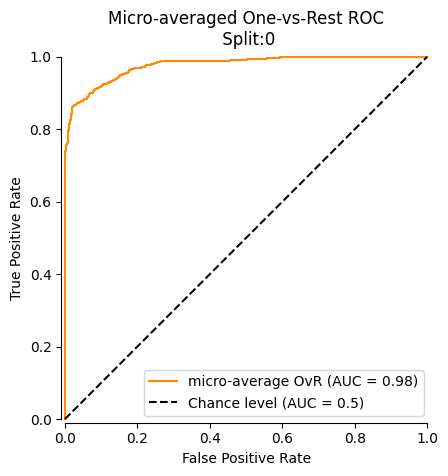

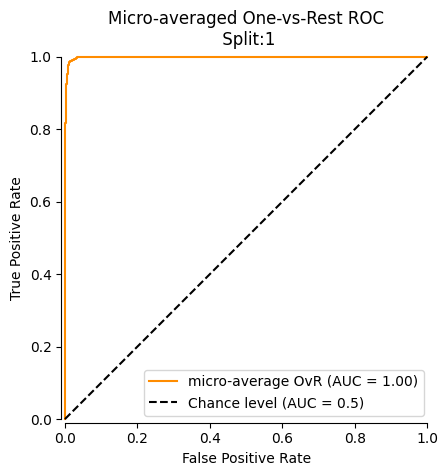

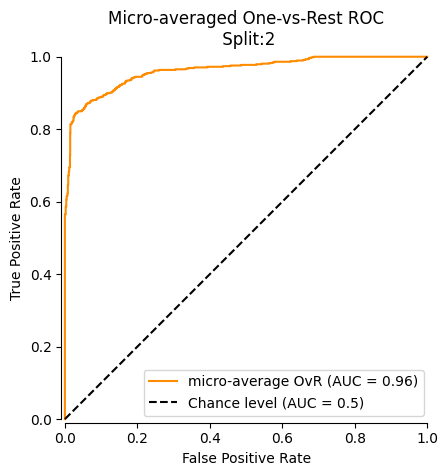

In [85]:
kf = KFold(n_splits=3, shuffle=False)
accuracies = []
from sklearn.metrics import RocCurveDisplay

for i, (train_index, test_index) in enumerate(kf.split(d_vectors)):
    X_train, X_test = d_vectors[train_index], d_vectors[test_index]
    Y_train, Y_test = genre_df.iloc[train_index], genre_df.iloc[test_index]

    clf = OneVsRestClassifier(SVC(probability = True, random_state=42)).fit(X_train, Y_train)
    Y_pred = clf.predict(X_test)
    accuracies.append(accuracy_score(Y_test, Y_pred))
    Y_proba = clf.predict_proba(X_test)
    
    display = RocCurveDisplay.from_predictions(
    Y_test.values.ravel(),
    Y_proba.ravel(),
    name="micro-average OvR",
    color="darkorange",
    plot_chance_level=True,
    despine=True,)
    _ = display.ax_.set(
    xlabel="False Positive Rate",
    ylabel="True Positive Rate",
    title=f"Micro-averaged One-vs-Rest ROC\n Split:{i}",)
    
    
print("Accuracy: "+str(np.mean(accuracies)))




test


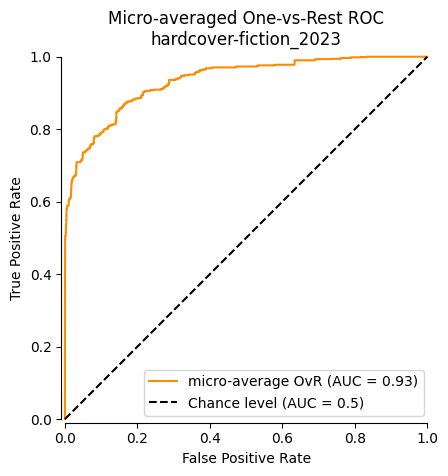

In [36]:
from sklearn.metrics import RocCurveDisplay
display = RocCurveDisplay.from_predictions(
    Y_test.values.ravel(),
    Y_proba.ravel(),
    name="micro-average OvR",
    color="darkorange",
    plot_chance_level=True,
    despine=True,
)
_ = display.ax_.set(
    xlabel="False Positive Rate",
    ylabel="True Positive Rate",
    title="Micro-averaged One-vs-Rest ROC\nhardcover-fiction_2023",
)

In [33]:
def get_genre_table(category):
    genre_options = []
    not_nan = data[category]['genre'][data[category]['genre'].isna() == False]
    for i, labels in enumerate(not_nan):
        for j, genre in enumerate(labels):
            if genre not in genre_options:
                genre_options.append(genre)
    print(len(genre_options))
    
    dummy_labels = {}
    for j, genre in enumerate(genre_options):
        dummy_labels[genre] = []

    for i, labels in enumerate(not_nan):
        for j, genre in enumerate(genre_options):
            if genre in labels:
                dummy_labels[genre].append(1)
            else:
                dummy_labels[genre].append(0)
    genre_df = pd.DataFrame(dummy_labels)

    for i, genre in enumerate(genre_df.columns):
        #print(sum(genre_df[genre]))
        if sum(genre_df[genre]) > len(genre_df) * 0.9:  # if label is present in over 90% of the samples
            genre_df.drop(genre, axis=1, inplace=True)
        elif sum(genre_df[genre]) < len(genre_df) * 0.1:  #if label is present in less than 1% of the samples
            genre_df.drop(genre, axis=1, inplace=True)
    print(len(genre_df.columns))
    return genre_df

In [42]:
def get_d_vectors(category):
    tfidf = TfidfVectorizer()
    not_nan_d = data['category'][category].loc[data['category'][category]['genre'].isna() == False, 'description']

    descriptions = []
    for i, description in enumerate(not_nan_d):
        words = word_tokenize(description, 'english')
        words = [w for w in words if w not in stop_words]
        stem_words = word_stemmer(words)
        stem_words = ' '.join(stem_words)
        descriptions.append(stem_words)
    d_vectors = tfidf.fit_transform(descriptions)
    return d_vectors

young-adult-hardcover_2023
76
18
young-adult-hardcover_2023 accuracy: 0.7086247086247086
combined-print-and-e-book-nonfiction_2023
413
28
combined-print-and-e-book-nonfiction_2023 accuracy: 0.5208333333333334
childrens-middle-grade-hardcover_2023
103
26
childrens-middle-grade-hardcover_2023 accuracy: 0.6616310087647667
trade-fiction-paperback_2023
83
22
trade-fiction-paperback_2023 accuracy: 0.7549019607843137
hardcover-fiction_2023
157
24
hardcover-fiction_2023 accuracy: 0.41283124128312415
paperback-nonfiction_2023
249
33
paperback-nonfiction_2023 accuracy: 0.7666666666666666
advice-how-to-and-miscellaneous_2023
282
17
advice-how-to-and-miscellaneous_2023 accuracy: 0.5895833333333333
graphic-books-and-manga_2023
95
17
graphic-books-and-manga_2023 accuracy: 0.65
hardcover-nonfiction_2023
380
24
hardcover-nonfiction_2023 accuracy: 0.45138888888888884
mass-market-monthly_2023
87
22
mass-market-monthly_2023 accuracy: 0.36527777777777776
series-books_2023
97
28
series-books_2023 accuracy:

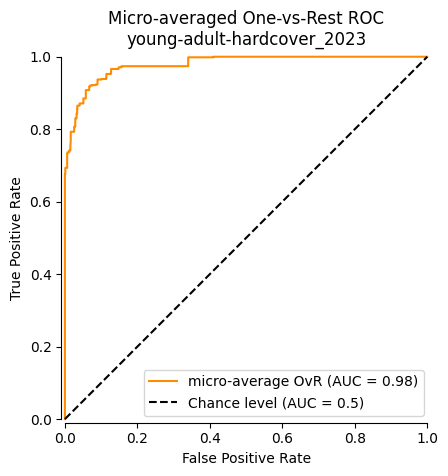

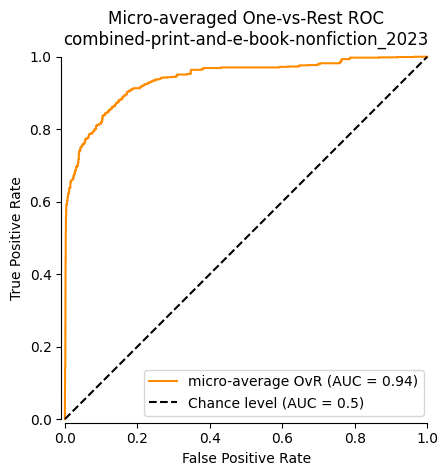

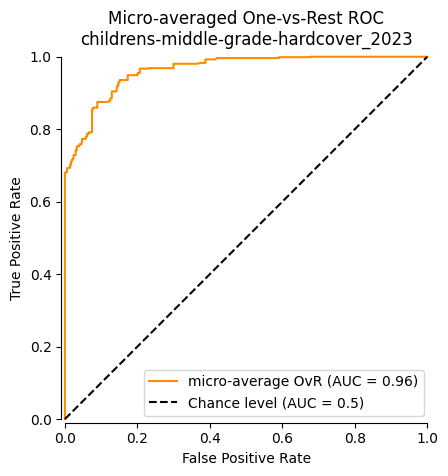

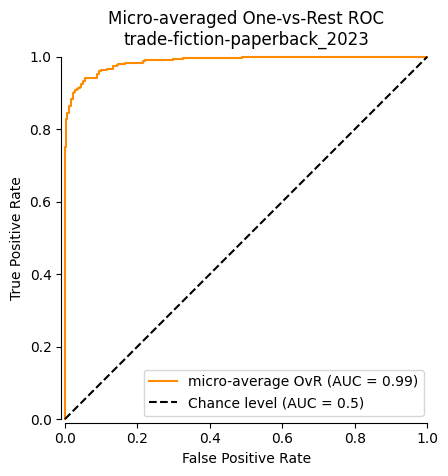

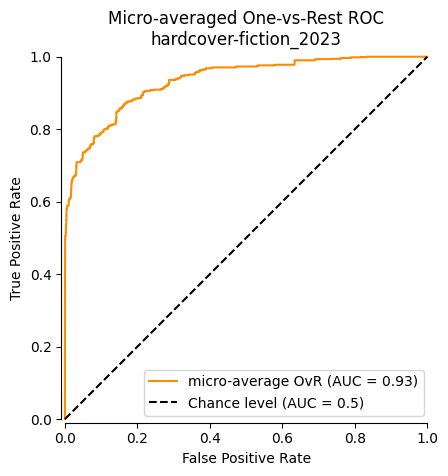

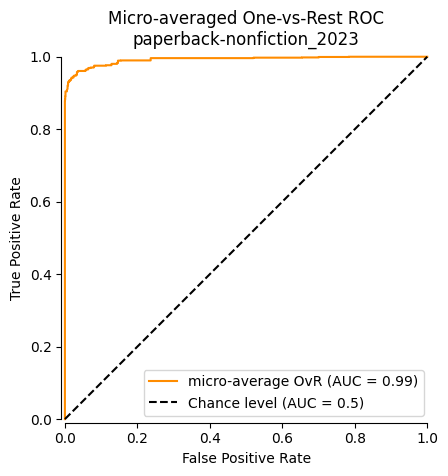

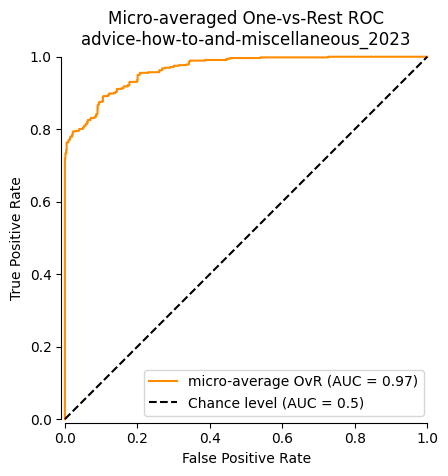

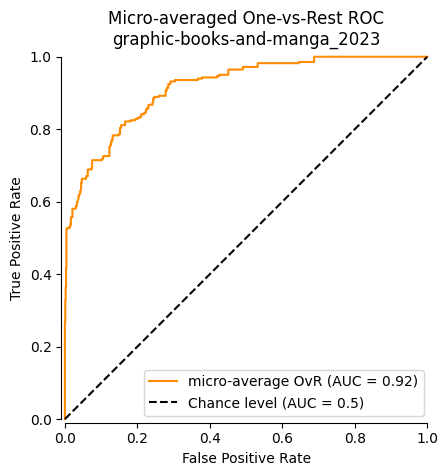

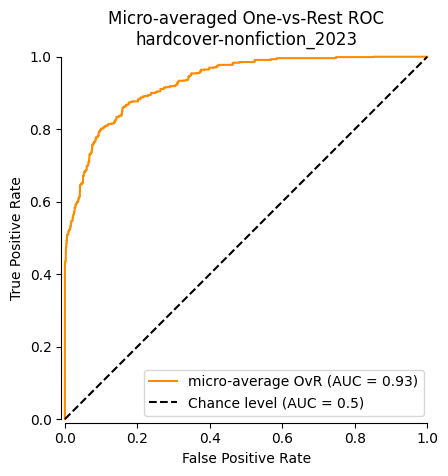

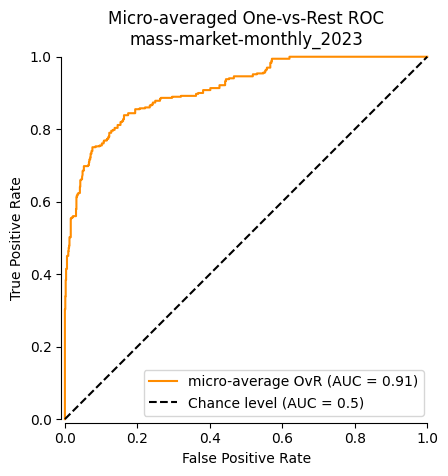

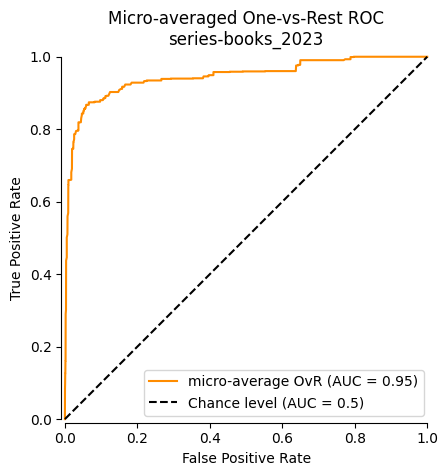

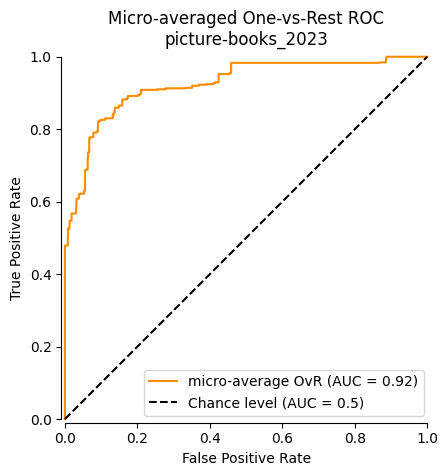

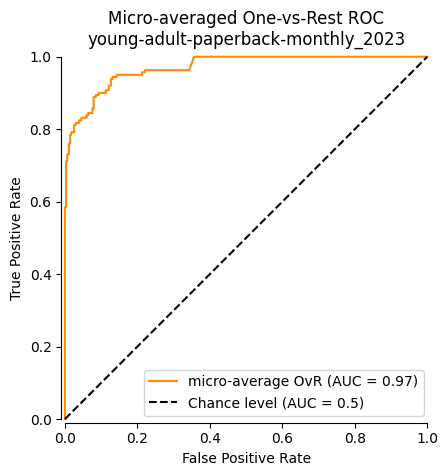

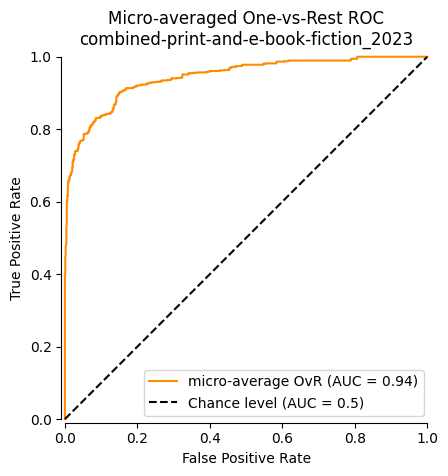

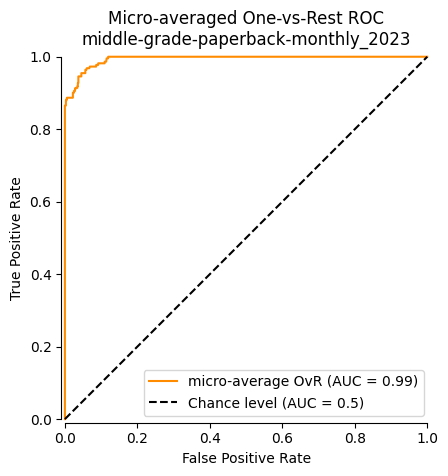

In [98]:
included_categories = data['category'].keys()-('audio-nonfiction_2023', 'audio-fiction_2023')
for i, category in enumerate(included_categories):
    print(category)
    genre_df = get_genre_table(category)
    d_vectors = get_d_vectors(category)
    
    accuracies = []

    for j, (train_index, test_index) in enumerate(kf.split(d_vectors)):
        X_train, X_test = d_vectors[train_index], d_vectors[test_index]
        Y_train, Y_test = genre_df.iloc[train_index], genre_df.iloc[test_index]

        clf = OneVsRestClassifier(SVC(probability = True, random_state=42)).fit(X_train, Y_train)
        Y_pred = clf.predict(X_test)
        accuracies.append(accuracy_score(Y_test, Y_pred))
        Y_proba = clf.predict_proba(X_test)
        
    print(f"{category} accuracy: {np.mean(accuracies)}")
    display = RocCurveDisplay.from_predictions(
        Y_test.values.ravel(),
        Y_proba.ravel(),
        name="micro-average OvR",
        color="darkorange",
        plot_chance_level=True,
        despine=True,
    )
    _ = display.ax_.set(
        xlabel="False Positive Rate",
        ylabel="True Positive Rate",
        title=f"Micro-averaged One-vs-Rest ROC\n{category}",
    )

In [3]:
plt.close('all')